In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wd
import matplotlib.pyplot as plt



In [3]:
indexs = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']
# list of index's

In [5]:
index_data = pd.DataFrame()

import datetime
import yfinance as yf

yf.pdr_override()

start = datetime.datetime(1995, 1, 1).date()

for i in indexs:
    index_data[i] = wd.get_data_yahoo(i, start)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
index_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049


In [7]:
index_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2023-07-17,4522.790039,14244.950195,16068.650391,7406.399902
2023-07-18,4554.979980,14353.639648,16125.490234,7453.700195
2023-07-19,4565.720215,14358.019531,16108.929688,7588.200195
2023-07-20,4534.870117,14063.309570,16204.219727,7646.100098
2023-07-21,4536.339844,14032.809570,16177.219727,7663.700195


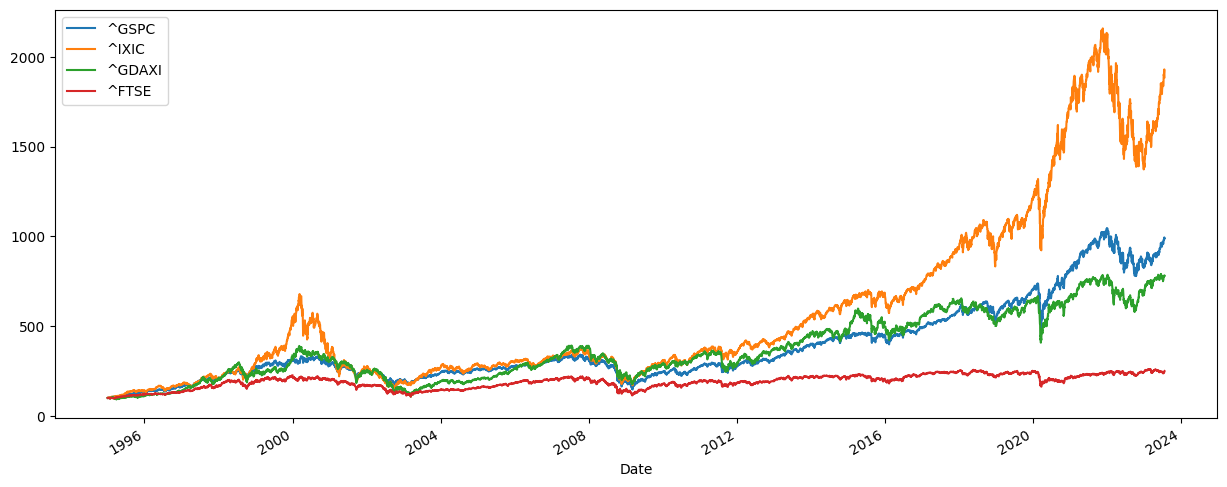

In [8]:
(index_data / index_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [9]:
index_returns = (index_data / index_data.shift(1)) - 1
index_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2023-07-17,0.003855,0.009299,-0.002261,-0.003793
2023-07-18,0.007117,0.007630,0.003537,0.006386
2023-07-19,0.002358,0.000305,-0.001027,0.018045
2023-07-20,-0.006757,-0.020526,0.005915,0.007630
2023-07-21,0.000324,-0.002169,-0.001666,0.002302


In [10]:
# annual returns
annual_returns = index_returns.mean() * 250
annual_returns

^GSPC     0.097863
^IXIC     0.132292
^GDAXI    0.085725
^FTSE     0.046661
dtype: float64

### compare company to index

In [12]:
tickers = ['PG', '^GSPC', '^DJI']
data_2 = pd.DataFrame()

start = datetime.datetime(1995, 1, 1).date()

for t in tickers:
    data_2[t] = wd.get_data_yahoo(t, start)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2023-07-17,148.057144,4522.790039,34585.351562
2023-07-18,148.335388,4554.979980,34951.929688
2023-07-19,149.348999,4565.720215,35061.210938
2023-07-20,150.559998,4534.870117,35225.179688
2023-07-21,152.929993,4536.339844,35227.691406


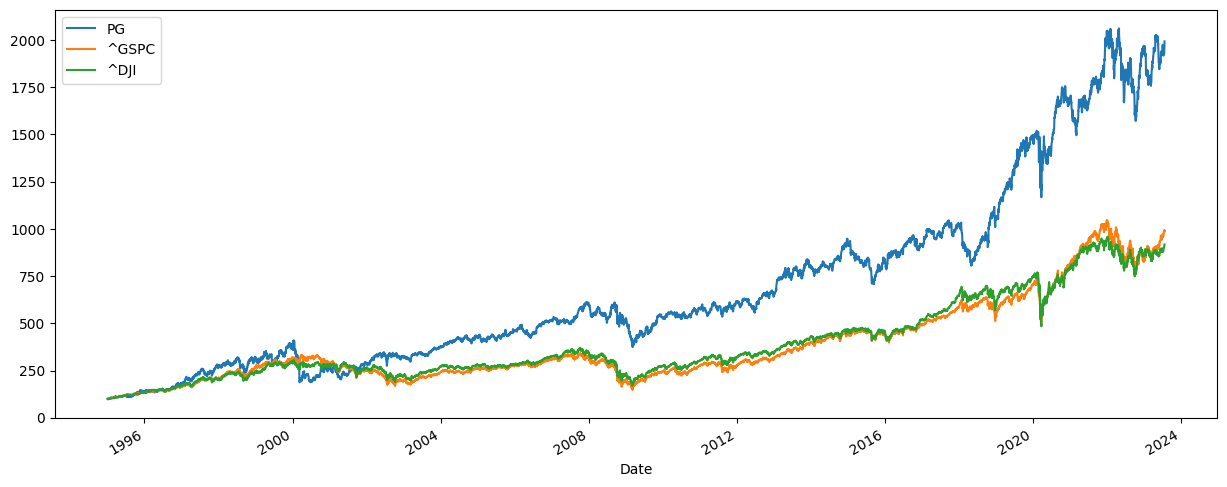

In [14]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15,6))
plt.show()